In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Lymphography.csv')
dataset

,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation,exclusion,no. of nodes,class
0,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2,3
1,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2,2
2,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7,3
3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6,3
4,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1,2
5,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4,2
6,2,2,1,1,1,1,1,2,1,2,3,2,3,8,2,1,1,1,2
7,3,2,1,1,1,2,1,2,1,2,2,2,2,1,3,1,1,1,2
8,2,2,1,1,1,1,1,2,1,3,2,2,2,8,3,1,2,5,3
9,2,1,1,1,1,1,1,2,1,2,2,3,3,5,3,1,1,2,3


In [3]:
dataset.isnull().sum()
print(dataset.isnull().sum())

lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym     0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation        0
exclusion          0
no. of nodes       0
class              0
dtype: int64


In [4]:
# iterating the columns 
for col in dataset.columns: 
    print(col)

lymphatics
block of affere
bl. of lymph. c
bl. of lymph. s
by pass
extravasates
regeneration of
early uptake in
lym.nodes dimin
lym.nodes enlar
changes in lym
defect in node
changes in node
changes in stru
special forms
dislocation
exclusion
no. of nodes
class


In [5]:
X = dataset.iloc[:, 0:18].values
x = dataset.iloc[:, 0:18]
y = dataset.iloc[:, 18].values
y_name = dataset.iloc[:, 18:19]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (148, 18)
y shape: (148, 1)


In [6]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

lymphatics
block of affere
bl. of lymph. c
bl. of lymph. s
by pass
extravasates
regeneration of
early uptake in
lym.nodes dimin
lym.nodes enlar
changes in lym
defect in node
changes in node
changes in stru
special forms
dislocation
exclusion
no. of nodes


Class:
class


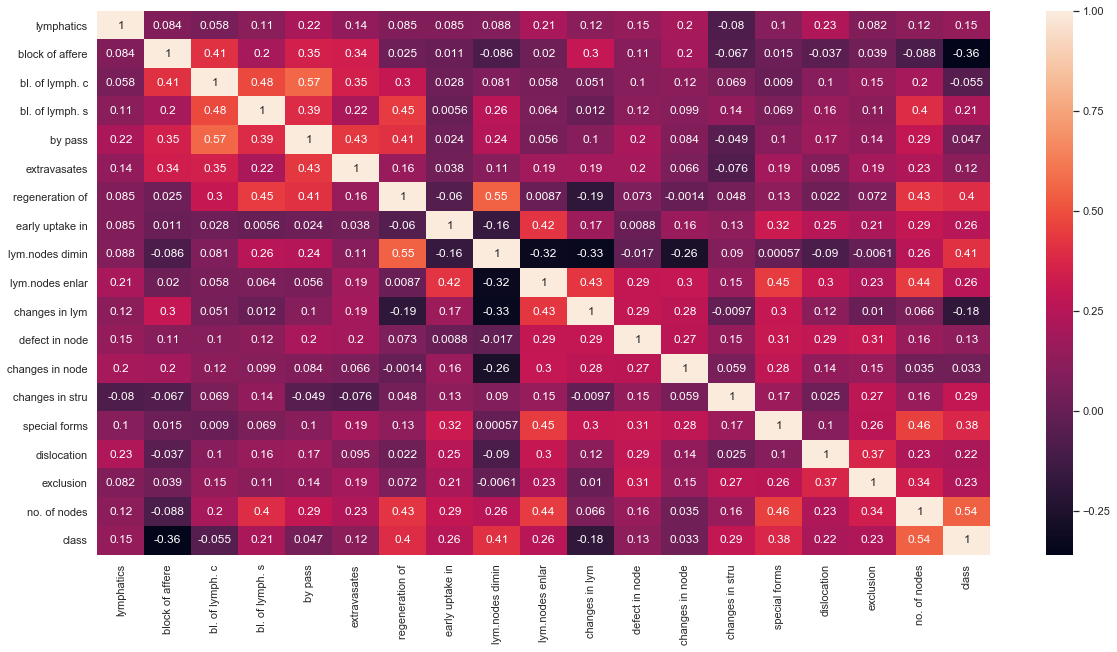

In [7]:
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 10
                                      , metric = 'euclidean')

In [30]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [31]:
y_pred_knn = classifier_knn.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)


[[23  1  0]
 [ 9 11  0]
 [ 0  1  0]]


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
ac  = accuracy_score(y_test, y_pred_knn)
pre = precision_score(y_test, y_pred_knn, average='weighted')
re  = recall_score(y_test, y_pred_knn, average='weighted')
f1  = f1_score(y_test, y_pred_knn, average='weighted')
mc  = matthews_corrcoef(y_test, y_pred_knn)  

In [34]:
np.set_printoptions()
print("Akurasi =", ac)
print("Presisi =",pre)
print("Recall =", re)
print("F1 =", f1)
print("MCC =", mc)

Akurasi = 0.7555555555555555
Presisi = 0.7594017094017094
Recall = 0.7555555555555555
F1 = 0.7343915343915345
MCC = 0.5376026646821981


In [35]:
print(ac)
print(pre)
print(re)
print(f1)
print(mc)

0.7555555555555555
0.7594017094017094
0.7555555555555555
0.7343915343915345
0.5376026646821981


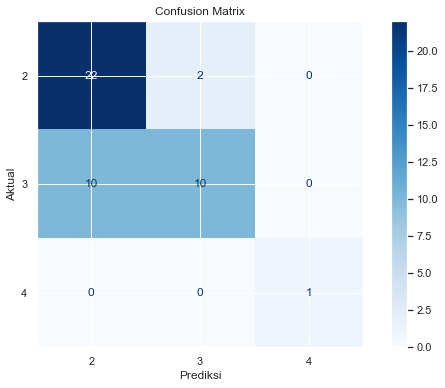

In [18]:
matrix = plot_confusion_matrix(classifier_knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.gcf().axes[0].tick_params
plt.gcf().axes[1].tick_params
plt.gcf().set_size_inches(10,6)
plt.show()

In [17]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [18]:
error

[0.24444444444444444,
 0.24444444444444444,
 0.17777777777777778,
 0.2,
 0.2,
 0.15555555555555556,
 0.2,
 0.2,
 0.2,
 0.17777777777777778,
 0.2222222222222222,
 0.17777777777777778,
 0.2,
 0.17777777777777778,
 0.24444444444444444,
 0.2,
 0.2,
 0.17777777777777778,
 0.24444444444444444,
 0.2,
 0.24444444444444444,
 0.2,
 0.2222222222222222,
 0.2222222222222222,
 0.24444444444444444,
 0.24444444444444444,
 0.2222222222222222,
 0.2222222222222222,
 0.2222222222222222,
 0.2,
 0.17777777777777778,
 0.17777777777777778,
 0.17777777777777778,
 0.15555555555555556,
 0.17777777777777778,
 0.17777777777777778,
 0.17777777777777778,
 0.15555555555555556,
 0.2]

Text(0, 0.5, 'Error rata-rata')

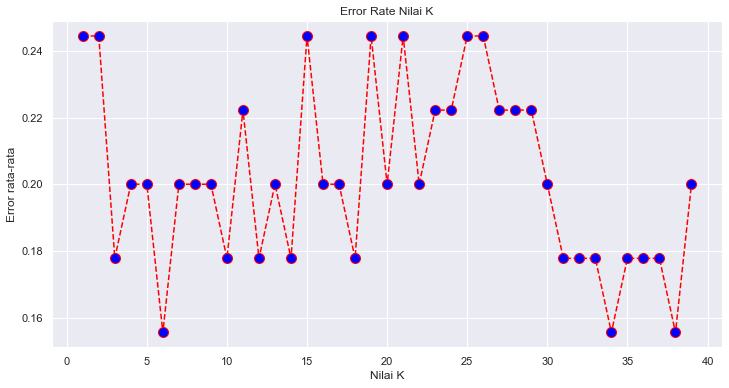

In [19]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')